In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols = ['Gender', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('abalone.csv', names = cols)
df = df.join(pd.get_dummies(df['Gender'], prefix = 'Gender')).drop(columns = ['Gender'])

def label_ring(r):
    if r == 9:
        return 1
    else:
        return np.sign(r-9)

df['Rings_label'] = df['Rings'].apply(lambda x: label_ring(x))

col_order_2 = ['Rings_label','Gender_-1','Gender_0','Gender_1', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
df =  df[col_order_2]
display(df.head())

X_train = df.iloc[:3133, 1:].values
y_train = df.iloc[:3133,0].values

X_all = df.iloc[:,1:].values
y_all = df.iloc[:, 0].values

,Rings_label,Gender_-1,Gender_0,Gender_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,-1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,-1,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [3]:
ada_CV = []

for i in range(10):    
    adaBoost = GradientBoostingClassifier(loss = 'exponential', n_estimators = 100*(1+i), max_depth = 1, random_state=0)
    adaBoost.fit(X_train, y_train)
    
    results  = cross_validate(adaBoost, X_all, y_all, cv=10)
    ada_CV.append(results['test_score'].mean())

logit_CV = []

for i in range(10):
    logitBoost = GradientBoostingClassifier(loss = 'deviance', n_estimators = 100*(1+i) , max_depth = 1, random_state=0)
    logitBoost.fit(X_train, y_train)
    
    results = cross_validate(logitBoost, X_all, y_all, cv=10)
    logit_CV.append(results['test_score'].mean())

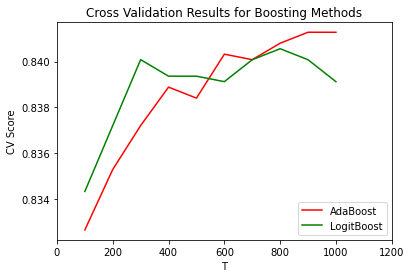

In [9]:
x_axis = [100, 200, 300, 400, 500, 600, 700, 800, 900,1000]
plt.plot(x_axis, ada_CV,'-r', label = 'AdaBoost')
plt.plot(x_axis, logit_CV,'-g',label = 'LogitBoost')
plt.legend()
plt.title('Cross Validation Results for Boosting Methods')
plt.xlabel('T')
plt.ylabel('CV Score')
plt.xlim(0,1200,0)
plt.show()